Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset.
a. Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results
using confusion matrix.


Data Preprocessing

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [4]:
# Reshape the images to fit the CNN input shape
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [5]:
# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Define the Model

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.metrics import Accuracy

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile the model with accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[Accuracy()])


Train the Model

In [9]:
model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose=1, validation_data=(test_images, test_labels))


Epoch 1/10
469/469 [==============================] - 66s 135ms/step - loss: 0.1919 - accuracy: 0.9455 - val_loss: 0.0528 - val_accuracy: 0.9829
Epoch 2/10
469/469 [==============================] - 58s 124ms/step - loss: 0.0551 - accuracy: 0.9835 - val_loss: 0.0415 - val_accuracy: 0.9873
Epoch 3/10
469/469 [==============================] - 60s 127ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0329 - val_accuracy: 0.9891
Epoch 4/10
469/469 [==============================] - 54s 115ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0344 - val_accuracy: 0.9885
Epoch 6/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0245 - val_accuracy: 0.9919
Epoch 7/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0279 - val_ac

Evaluate Results Using Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [11]:
# Make predictions on the test dataset
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 10ms/step


In [12]:
# Convert test labels back to class labels
test_labels = np.argmax(test_labels, axis=1)

In [13]:
# Create confusion matrix
cm = confusion_matrix(test_labels, predictions)

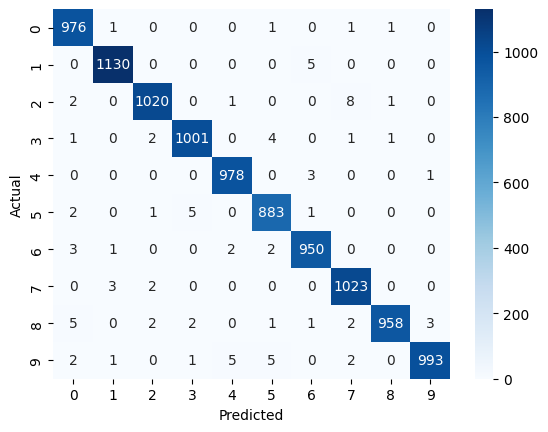

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cm' is your confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- Data Preprocessing
Normalization: Scaling pixel values to a range between 0 and 1 to help the model converge faster during training.
Data Augmentation: Creating modified versions of images to increase the dataset size and improve model generalization.
One-Hot Encoding: Converting class labels into a binary matrix representation for multiclass classification.
- Defining the Model
Convolutional Layers: Apply filters to capture local features in images.
Pooling Layers: Reduce spatial dimensions to decrease computational complexity and control overfitting.
Fully Connected Layers: Perform high-level reasoning after convolutional and pooling layers.
Softmax Activation: Converts output into a probability distribution over classes for multiclass classification.
- Training the Model
Loss Function: Categorical cross-entropy for multiclass classification.
Optimizer: Adam for efficient weight updates.
Batch Size and Epochs: Determines the number of samples to process before updating weights and the number of times to iterate over the entire dataset.
- Evaluating Results
Confusion Matrix: Summarizes correct and incorrect predictions for each class.
Classification Metrics: Accuracy, precision, recall, and F1 score provide different perspectives on model performance.
- Visualization
Confusion Matrix Visualization: Helps understand the model's performance across different classes.
Feature Map Visualization: Shows the output of each filter in a given layer for a particular input image, aiding in understanding the features the network is learning.